<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Строитстся модель машинного обучения для промышленной компании, разрабатывающая решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды на основе данных с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.dummy import DummyRegressor

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col=['date'])
df_test_features = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col=['date'])
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col=['date'])

In [3]:
# функция для просмотра общей инфо, пропусков и дубликатов
def info(df):
    display(df.sample(5))
    display(df.info())
    display(df.duplicated().sum())
    display(df.isna().sum())

In [4]:
info(df_train)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-22 02:00:00,6.260931,11.496018,11.144682,40.444686,75.452401,13.150998,2.361547,9.399365,3.220474,170.241420,12.414271,7.90,0.730119,10.289249,8.575471,15.980221,32.570584,16.597771,3.667769,8.303999,3.798097,1749.246450,-399.596326,1750.538802,-400.660218,1749.497991,-399.539807,1422.453822,-399.774111,49017.392318,3195.837055,3190.840029,2.272769,12.522556,4.637387,349.926428,41.044682,29.711695,10.539710,12.013361,6.698250,12.034844,6.700693,12.642302,8.193063,28.200364,20.438642,92.490455,5.473868,0.251788,11.991124,1.513212,1099.660927,-500.050203,1650.126200,-500.180512,1650.338471,-501.160592,1650.326596,-500.083136,1601.422507,-500.091458,1599.911200,-501.031698,14.974971,5.141267,10.962387,3.781047,30.980837,-400.087439,28.973111,-400.291169,30.972687,-399.588694,29.026510,-400.258019,14.072282,-400.118030,11.957044,-399.172670,11.961944,-400.081369,10.105059,-399.556166,30.030947,-399.519059
2017-01-04 11:59:59,7.964490,6.506338,14.350105,43.435587,70.70

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

None

0

final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 286
primary_cleaner.output.concentrate_au                   

In [5]:
info(df_test_features)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-19 06:59:59,233.558412,11.016358,6.480000,4.012052,1649.537165,-500.250153,1635.778486,-508.481735,1566.724061,-491.298486,1649.307725,-500.980640,11.376031,4.850528,518.917913,56.232167,37.441219,11.716934,18.452760,6.690639,18.451534,6.694852,1201.329326,-299.898524,1301.365550,-500.787829,1299.681191,-500.166795,1200.267883,-500.199229,1099.185001,-499.791260,998.959591,-499.837064,21.887509,-499.784110,19.915967,-499.811095,24.984392,-499.569134,21.997889,-500.114443,16.988208,-502.009137,14.959560,-508.136707,10.940890,-501.567806,9.007690,-436.488316,16.004253,-500.088476
2016-10-14 00:59:59,177.366752,11.937329,7.743334,0.848520,1639.747479,-499.150963,1699.028517,-500.102853,1697.881204,-500.246506,1701.036785,-500.518024,10.654057,4.223969,418.356313,42.342514,35.103522,11.873050,13.999449,7.163446,14.008600,7.200799,999.971024,-499.952365,1449.624569,-399.516367,1399.239703,-399.467209,1300.271917,-399.637613,1050.338328,-399.760237,950.432917,-399.526459,30.053405,-499.777779,24.947242,-500.706015,32.968579,-500.314425,31.018272,-499.955141,16.007696,-500.785370,11.964814,-502.727346,9.618442,-499.799398,8.007930,-499.276235,17.011526,-500.705532
2017-10-22 15:59:59,229.602936,13.989760,7.050000,2.513841,1700.907850,-480.622079,1699.590429,-557.399023,1583.137364,-489.137555,1696.994501,-501.040705,10.039821,5.564557,618.271034,67.312761,45.535336,10.083718,22.998109,7.101339,22.995689,7.100803,1300.230194,-299.500480,1000.423391,-500.578677,949.547668,-499.957721,900.864886,-501.496683,847.359932,-500.751842,847.222546,-499.333770,31.168231,-500.053256,28.039734,-500.127632,25.012157,-500.618402,23.022836,-500.174962,21.017396,-501.396368,19.068860,-399.876622,14.960667,-501.558474,11.005344,-500.153014,15.997183,-500.826263
2016-12-16 03:59:59,172.345363,12.478845,7.360000,1.324675,1500.905514,-499.725080,1499.291720,-499.188276,1501.084925,-499.348957,1499.652603,-499.946572,10.789890,3.228997,392.805010,42.074808,33.456903,9.739778,11.999662,6.101322,12.005726,6.099686,999.988008,-500.131036,1399.783917,-499.88

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

None

0

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [6]:
info(df_full)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-24 14:00:00,4.313079,12.514828,11.377263,43.578747,70.314169,12.934959,2.742259,11.707530,3.372015,148.929844,10.980669,8.22,0.710541,8.946256,10.281315,15.531315,34.115938,17.323574,3.977528,7.914417,3.638079,1546.279766,-450.030311,1553.692647,-450.081673,1553.552018,-449.991649,1244.124005,-450.001403,48892.865702,3096.306773,3104.044380,2.100013,11.398907,4.571216,351.281889,41.096924,30.225805,9.599615,10.295676,5.706480,10.313436,5.697617,12.456583,9.036817,29.575227,20.740149,91.689037,5.247344,0.301369,12.912565,1.386030,1099.400121,-499.874203,1649.803289,-499.693861,1648.646146,-501.999727,1650.757788,-499.220255,1599.508794,-500.212139,1601.142745,-500.418107,15.817175,5.584611,11.398665,4.004858,31.021713,-499.343478,28.981013,-499.627304,28.037090,-500.299927,26.022034,-500.014219,14.021794,-497.414274,12.012708,-499.954051,12.011052,-499.751127,10.040341,-499.402553,19.982461,-500.540918
2017-07-12 07:59:59,6.479581,11.547810,12.010130,40.984069,61.9

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

None

0

final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 370
primary_cleaner.output.concentrate_au                   

Расчёт эфективности на тестовой выборке:

In [7]:
# формула расчёта
df_train['recovery'] = (df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) \
/(df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100

In [8]:
# расчёт MAE 
df_predicted = df_train['recovery']
df_target = df_train['rougher.output.recovery']
display(mean_absolute_error(df_target, df_predicted))

9.73512347450521e-15

Вывод: формула эффективности проверена, результаты совпадаю вплоть до пятнадцатого знака после запятой.

Формируем выборки для обучения и теста, заполняем пропуски, избавляемся от нулевых значений.

In [9]:
# срез по индексам для целевых признаков для тестовой выборки
df_test_target = df_full.loc[df_test_features.index, ['rougher.output.recovery', 'final.output.recovery']]

In [10]:
# избавляемся от нулей в целевом признаке для обучающейся выборки
df_train = df_train.loc[df_train['rougher.output.recovery'] > 0]

In [11]:
# общие концентрации веществ на каждой стадии
df_train['input_feed'] = df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_sol'] + df_train['rougher.input.feed_au']
df_train['rougher_concentrate'] = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'] + df_train['rougher.output.concentrate_au']
df_train['primary_cleaner_concentrate'] = df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_sol'] + df_train['primary_cleaner.output.tail_au']
df_train['final_concentrate'] = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'] + df_train['final.output.concentrate_au']

In [12]:
# избавляемся от нулевых значений в общих концентрациях
df_train = df_train.loc[(df_train['input_feed'] > 0.1) &
                       (df_train['rougher_concentrate'] > 0.1) &
                       (df_train['primary_cleaner_concentrate'] > 0.1) &
                       (df_train['final_concentrate'] > 0.1)
                       ]

In [13]:
df_train_target = df_train.loc[:, ['rougher.output.recovery', 'final.output.recovery']]

In [14]:
# в обучающейся выборке оставляет те признаки, которые присуствуют в тестовой выборке
my_list = list(df_test_features)
df_train_features =  df_train.loc[:, my_list]

In [15]:
df_train_calculation = df_train.drop(columns = my_list)

In [16]:
info(df_train_calculation)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,recovery,input_feed,rougher_concentrate,primary_cleaner_concentrate,final_concentrate
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-21 12:59:59,4.094733,12.345921,6.169018,44.098787,81.500865,6.453219,2.051143,8.153910,1.206987,7.972211,14.210934,8.398902,32.689357,17.267206,4.175484,7.407307,2.447848,45780.942105,2783.836042,2783.252669,1.531995,11.421528,11.009844,27.383421,15.527755,90.866783,3.813650,0.393441,20.579262,0.806611,15.229899,10.967294,0.799346,2.259752,90.866783,62.429009,65.342548,33.029895,66.708460
2016-04-10 17:00:00,8.519557,9.857180,8.959617,38.730452,59.758162,7.238136,2.033523,10.709712,3.068662,10.029115,7.550792,14.535275,33.543787,12.550407,2.262139,7.580269,5.400104,46012.300683,3054.409935,3055.255638,3.168455,9.977433,7.577566,24.652793,19.833298,75.642405,5.919197,0.854363,16.841871,2.246426,10.497792,4.765988,8.453420,3.789202,75.642405,45.729926,62.041091,37.515286,66.066807
2017-06-02 12:59:59,5.399137,11.221450,9.193169,42.535936,44.070340,9.411649,4.341046,9.590669,5.900609,8.150827,12.501033,11.623503,33.700860,15.236645,4.295345,9.540816,10.567073,45138.097098,7696.998972,7273.585381,1.969605,11.259115,9.213694,35.089271,22.057904,82.087634,6.917984,0.760983,13.540985,2.636794,13.246129,9.634909,4.768134,18.730907,82.087634,60.460249,77.619984,42.842435,68.349691
2017-02-17 05:59:59,5.907132,11.485389,15.306424,43.176355,74.102535,12.166590,4.079004,9.011324,3.577430,9.836186,11.787366,11.415254,29.963957,16.476741,3.607105,9.192347,4.273477,46207.260850,3008.446819,3008.796773,2.010159,13.045421,9.415747,32.463026,21.839638,91.142469,6.534797,0.419677,11.377687,1.852210,15.540268,4.390044,12.010108,2.961467,91.142469,53.352343,76.763832,37.312284,75.875299
2018-03-13 07:59:59,5.989402,9.772776,8.389762,44.066337,81.263958,10.276228,1.794333,6.439588,2.233464,8.145487,8.699002,9.081538,35.072456,20.990639,4.828638,4.997649,3.540759,38547.281836,2482.971611,2482.876340,2.323324,13.310743,7.185605,29.869362,20.203529,92.639452,5.662537,0.495874,18.732283,1.303305,18.611353,7.687020,NaN,4.137337,92.639452,64.681708,70.569238,29.466787,68.218276


<class 'pandas.core.frame.DataFrame'>
Index: 13181 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         13181 non-null  float64
 1   final.output.concentrate_pb                         13181 non-null  float64
 2   final.output.concentrate_sol                        13181 non-null  float64
 3   final.output.concentrate_au                         13181 non-null  float64
 4   final.output.recovery                               13181 non-null  float64
 5   final.output.tail_ag                                13181 non-null  float64
 6   final.output.tail_pb                                13165 non-null  float64
 7   final.output.tail_sol                               13179 non-null  float64
 8   final.output.tail_au                             

None

0

final.output.concentrate_ag                              0
final.output.concentrate_pb                              0
final.output.concentrate_sol                             0
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                    16
final.output.tail_sol                                    2
final.output.tail_au                                     0
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                    0
primary_cleaner.output.concentrate_sol                   0
primary_cleaner.output.concentrate_au                    0
primary_cleaner.output.tail_ag                           1
primary_cleaner.output.tail_pb                          15
primary_cleaner.output.tail_sol                         25
primary_cleaner.output.tail_au                          

Вывод: В тестовой выборке нет столбцов со значениями концентратов на каждом этапе очистки. Эти столбцы носят информативный характер. Для обучения эта информация не подходит. 

In [17]:
# заполним пропуски в подготовленных выборках для каждого столбца медианой
df_train_features = df_train_features.fillna(df_train_features.median())
df_test_features = df_test_features.fillna(df_test_features.median())

## Анализ данных

Концентрации металов на разных этапах очистки

<AxesSubplot:>

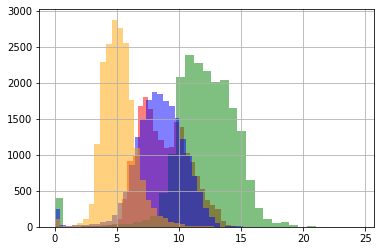

In [18]:
# концентрация серебра
df_full['rougher.input.feed_ag'].hist(bins=35, alpha=0.5, color='red')
df_full['rougher.output.concentrate_ag'].hist(bins=35, alpha=0.5, color='green')
df_full['primary_cleaner.output.concentrate_ag'].hist(bins=35, alpha=0.5, color='blue')
df_full['final.output.concentrate_ag'].hist(bins=35, alpha=0.5, color='orange')

<AxesSubplot:>

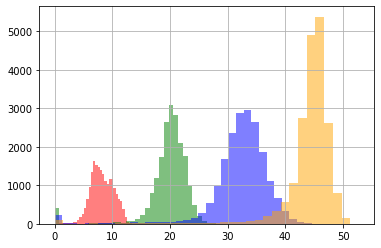

In [19]:
# концентрация золота
df_full['rougher.input.feed_au'].hist(bins=35, alpha=0.5, color='red')
df_full['rougher.output.concentrate_au'].hist(bins=35, alpha=0.5, color='green')
df_full['primary_cleaner.output.concentrate_au'].hist(bins=35, alpha=0.5, color='blue')
df_full['final.output.concentrate_au'].hist(bins=35, alpha=0.5, color='orange')

<AxesSubplot:>

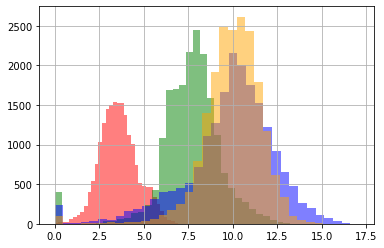

In [20]:
# концентрация свинца
df_full['rougher.input.feed_pb'].hist(bins=35, alpha=0.5, color='red')
df_full['rougher.output.concentrate_pb'].hist(bins=35, alpha=0.5, color='green')
df_full['primary_cleaner.output.concentrate_pb'].hist(bins=35, alpha=0.5, color='blue')
df_full['final.output.concentrate_pb'].hist(bins=35, alpha=0.5, color='orange')

Вывод: Концентрация свинца на разных этапах почти не меняется. Концентрация серебра поэтапно падает. Концентрация золота растёт, что не удивительно, ведь добывают золото.

Сравнение размеров гранул сырья в тестовой и обучающей выборках

In [21]:
results = st.ttest_ind(
    df_train_features['rougher.input.feed_size'], 
    df_test_features['rougher.input.feed_size'], equal_var=False)

alpha = 0.05

display(results.pvalue) 
if results.pvalue < alpha: 
    display("Размеры гранул сырья в тестовой и обучающей выборках равны")
else:
    display("Распределения в двух выборках сильно отличаются друг от друга")

2.3820657274841597e-35

'Размеры гранул сырья в тестовой и обучающей выборках равны'

Вывод: Распределения размеров в тестовой и обучающей выборках равны - оценка модели будет корректной. 

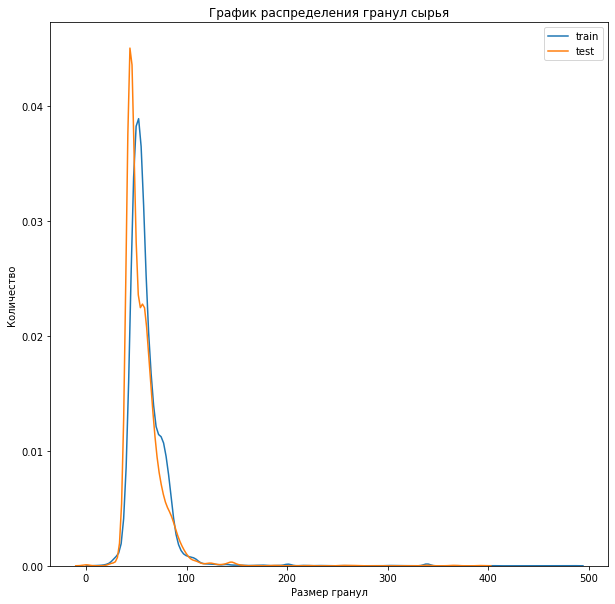

In [22]:
# Строим график распределения гранул сырья для обучающей и тестовой выборок
plt.figure(figsize=(10, 10))

sns.kdeplot(df_train_features['rougher.input.feed_size']);
sns.kdeplot(df_test_features['rougher.input.feed_size']);

plt.title('График распределения гранул сырья')
plt.legend(['train', 'test'])
plt.ylabel('Количество')
plt.xlabel('Размер гранул')
plt.show()

Исследуем суммарную концентрацию всех веществ на разных стадиях

<AxesSubplot:>

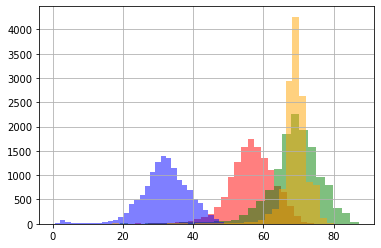

In [23]:
df_train['input_feed'].hist(bins=35, alpha=0.5, color='red')
df_train['rougher_concentrate'].hist(bins=35, alpha=0.5, color='green')
df_train['primary_cleaner_concentrate'].hist(bins=35, alpha=0.5, color='blue')
df_train['final_concentrate'].hist(bins=35, alpha=0.5, color='orange')

Вывод: После флотации и обогащения руды концентрация веществ высокая. После очистки общая концентрация веществ падает. На финальном этапе концентрацию веществ востанавливают.

## Модель

In [24]:
# функция для расчёта sMAPE
def smape(actual, forecast):
    return 2 * np.mean(np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)) * 100)

In [25]:
smape_final = make_scorer(smape, greater_is_better=False)

In [26]:
# функция для итоговой sMAPE
def smape_total(rougher, final):
    return 0.25 * round(rougher, 4) + 0.75 * round(final, 4)

Оцениваем качество модели Линейная Регрессия

In [27]:
model_linear= LinearRegression()

In [28]:
pipeline_linear = make_pipeline(StandardScaler(), model_linear)

In [29]:
scores_rougher = cross_val_score(pipeline_linear, df_train_features, df_train_target['final.output.recovery'], scoring=smape_final, cv=10, error_score='raise')

In [30]:
scores_rougher.mean() * -1

9.475920027289051

Оцениваем качество модели Случайный Лес

In [31]:
model_forest = RandomForestRegressor(random_state=12345)

In [32]:
pipeline_forest = make_pipeline(StandardScaler(), model_forest)

In [33]:
param = {
    'randomforestregressor__n_estimators': range(1, 5 ),
    'randomforestregressor__max_depth': range(1, 5),
}

In [34]:
final_forest = GridSearchCV(
    pipeline_forest,
    param_grid=param,
    scoring=smape_final,
    cv=10,
    n_jobs=-1
)

In [35]:
final_forest.fit(df_train_features, df_train_target['final.output.recovery'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=12345))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(1, 5),
                         'randomforestregressor__n_estimators': range(1, 5)},
             scoring=make_scorer(smape, greater_is_better=False))

In [36]:
final_forest_best_score = final_forest.best_score_ * -1

In [37]:
final_forest_best_score

8.312537942435586

Модель Случайный Лес дала лучший результат - берём её для тестирования

In [38]:
prediction_final = final_forest.predict(df_test_features)

In [39]:
smape_final = smape(df_test_target['final.output.recovery'], prediction_final) 

In [40]:
smape_final

10.042520351630042

In [41]:
final_forest.fit(df_train_features, df_train_target['rougher.output.recovery'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=12345))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(1, 5),
                         'randomforestregressor__n_estimators': range(1, 5)},
             scoring=make_scorer(smape, greater_is_better=False))

In [42]:
prediction_rougher = final_forest.predict(df_test_features)

In [43]:
smape_rougher = smape(df_test_target['rougher.output.recovery'], prediction_rougher) 

In [44]:
smape_rougher

8.064249409862668

In [45]:
display(smape_total(smape_rougher, smape_final))

9.547925

Вывод: на тесте модель продемонстрировала приемлемый результат по итоговой метреке sMAPE.